In [ ]:
import pandas as pd
import numpy as np

# Membaca file CSV dengan encoding 'latin1'
df = pd.read_csv('spam.csv', encoding='latin1')

# Menampilkan data
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
# DROP Kolom yg gk guna
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'], inplace=True)

# DISPLAY beberapa data sesudah di drop
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


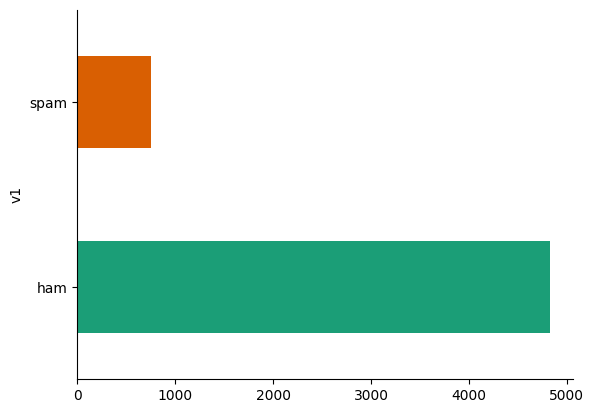

In [ ]:
# @title v1

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# RENAME COLUMNS
df.rename(columns={'v1':'Category' , 'v2':'Message'} , inplace='True')

# DISPLAY THE FIRST FEW ROWS AFTER RENAMING COLUMNS
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
!pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 762.4 kB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='auto', target='id')

def translate_to_indonesian(text):
    try:
        translation = translator.translate(text)
        return translation
    except Exception as e:
        print(f"Error translating {text}: {e}")
        return text

In [ ]:
import time

# Mencatat waktu mulai
start_time = time.time()

# Menerjemahkan seluruh kolom 'Message'
df['Pesan'] = df['Message'].apply(translate_to_indonesian)

# Mencatat waktu selesai
end_time = time.time()

# Menghitung selisih waktu
process_time = end_time - start_time

# Membuat DataFrame baru dengan kolom yang telah diterjemahkan
translated_df = pd.DataFrame({
    'Pesan': df['Pesan'],
    'Kategori': df['Category']
})

In [ ]:
# Menampilkan 5 baris pertama dari DataFrame yang baru
print(translated_df.head())

                                               Pesan Kategori
0  Pergi sampai jurong point, gila.. Hanya tersed...      ham
1                 Ok lar... Bercanda denganmu oni...      ham
2  Entri gratis dalam 2 minggu berturut-turut unt...     spam
3  Kamu tidak bilang pagi-pagi sekali, hor... Kam...      ham
4  Tidak, menurutku dia tidak pergi ke usf, dia t...      ham


In [ ]:
# Menyimpan DataFrame yang telah diterjemahkan ke dalam file CSV baru
translated_df.to_csv('translated_spam.csv', index=False)

print("File CSV baru berhasil disimpan sebagai 'translated_spam.csv'")

File CSV baru berhasil disimpan sebagai 'translated_spam.csv'


In [ ]:
# Menampilkan waktu yang diperlukan untuk proses penerjemahan
print(f"{process_time:.2f} detik.")

1874.82 detik.


In [ ]:
import pandas as pd
import numpy as np

# Membaca file CSV dengan encoding 'latin1'
df = pd.read_csv('translated_spam.csv', encoding='latin1')

# Menampilkan data
print(df)

                                                  Pesan Kategori
0     Pergi sampai jurong point, gila.. Hanya tersed...      ham
1                    Ok lar... Bercanda denganmu oni...      ham
2     Entri gratis dalam 2 minggu berturut-turut unt...     spam
3     Kamu tidak bilang pagi-pagi sekali, hor... Kam...      ham
4     Tidak, menurutku dia tidak pergi ke usf, dia t...      ham
...                                                 ...      ...
5567  Ini adalah kedua kalinya kami mencoba 2 menghu...     spam
5568  Akankah Ã_ b pergi ke lapangan terbuka dari r...      ham
5569  Sayang sekali, * sedang dalam mood untuk itu. ...      ham
5570  Pria itu mengomel tetapi saya bersikap seolah-...      ham
5571                    Rofl. Itu sesuai dengan namanya      ham

[5572 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Teks Prosessing

## Case Folding

In [ ]:
import re

# Membuat fungsi untuk case folding
def casefolding(text):
    if text is None:
        return ''
    text = text.lower()  # Merubah kalimat menjadi huruf kecil
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Menghapus URL dari kalimat
    text = re.sub(r'[-+]?[0-9]+', '', text)  # Menghapus angka dari kalimat
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus karakter tanda baca
    text = text.strip()
    return text

In [ ]:
#membandingkan before dan after case folding
raw_sample = df['Pesan'].iloc[555]
case_folding = casefolding(raw_sample)

print('Raw data\t : ',raw_sample)
print('Case Folding\t :', case_folding)

Raw data	 :  O. Ya, UV menyebabkan mutasi. Tabir surya sangat penting saat ini
Case Folding	 : o ya uv menyebabkan mutasi tabir surya sangat penting saat ini


## Word Normalization


In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat']== word]['hasil'].values[0]
                   if (key_norm['singkat']== word).any()
                   else word for word in text.split()
                   ])

  text = str.lower(text)
  return text

In [ ]:
# membandingkan before dan after word normalization

raw_data = df['Pesan'].iloc[555]
case_folding = casefolding(raw_data)
word_normal = text_normalize(case_folding)

print('Raw Data\t :', raw_data)
print('Case Folding\t :', case_folding)
print('Word Normalize\t :', word_normal)

Raw Data	 : O. Ya, UV menyebabkan mutasi. Tabir surya sangat penting saat ini
Case Folding	 : o ya uv menyebabkan mutasi tabir surya sangat penting saat ini
Word Normalize	 : o ya uv menyebabkan mutasi tabir surya sangat penting saat ini


##Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# melihat daftar stopwords dari nltk

stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# membuat fungsi stopwords removal

# menambahkan kata ke dalam stopwords
more_stopwords = ['tsel', 'gb', 'rb', 'btw']
stopwords_ind = stopwords_ind + more_stopwords

def remove_stop_word(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)

    return " ".join(clean_words)

In [ ]:
raw_sample = df['Pesan'].iloc[555]
case_folding = casefolding(raw_sample)
word_normal = text_normalize(case_folding)
stopwords_removal = remove_stop_word(word_normal)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('teks normalize \t\t :', word_normal)
print('Stop Removal \t\t :', stopwords_removal)

Raw Data 		 : O. Ya, UV menyebabkan mutasi. Tabir surya sangat penting saat ini
Case Folding 		 : o ya uv menyebabkan mutasi tabir surya sangat penting saat ini
teks normalize 		 : o ya uv menyebabkan mutasi tabir surya sangat penting saat ini
Stop Removal 		 : o ya uv menyebabkan mutasi tabir surya


## Stemming

In [ ]:
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
# merubah kata menjadi kata dasar

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk stemming bahasa indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = df['Pesan'].iloc[555]
case_folding = casefolding(raw_sample)
word_normal = text_normalize(case_folding)
stopword_removal = remove_stop_word(word_normal)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('teks normalize \t\t :', word_normal)
print('Stopword Removal \t :', stopword_removal)
print('Stemming \t\t :', text_stemming)

Raw Data 		 : O. Ya, UV menyebabkan mutasi. Tabir surya sangat penting saat ini
Case Folding 		 : o ya uv menyebabkan mutasi tabir surya sangat penting saat ini
teks normalize 		 : o ya uv menyebabkan mutasi tabir surya sangat penting saat ini
Stopword Removal 	 : o ya uv menyebabkan mutasi tabir surya
Stemming 		 : o ya uv sebab mutasi tabir surya


# Teks Preprocessing Pipeline

In [ ]:
# membuat fungsi untuk menggabungkan seluruh langkah teks preprocessing

def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_word(text)
  text = stemming(text)
  return text

In [ ]:
%%time
df['clean_teks']= df['Pesan'].apply(text_preprocessing_process)

AttributeError: 'float' object has no attribute 'lower'

In [ ]:
df

,Pesan,Kategori
0,"Pergi sampai jurong point, gila.. Hanya tersed...",ham
1,Ok lar... Bercanda denganmu oni...,ham
2,Entri gratis dalam 2 minggu berturut-turut unt...,spam
3,"Kamu tidak bilang pagi-pagi sekali, hor... Kam...",ham
4,"Tidak, menurutku dia tidak pergi ke usf, dia t...",ham
...,...,...
5567,Ini adalah kedua kalinya kami mencoba 2 menghu...,spam
5568,Akankah Ã_ b pergi ke lapangan terbuka dari r...,ham
5569,"Sayang sekali, * sedang dalam mood untuk itu. ...",ham
5570,Pria itu mengomel tetapi saya bersikap seolah-...,ham


In [ ]:
# Menyimpan DataFrame ke dalam file CSV baru
df.to_csv('cleaned_spam.csv', index=False)

NameError: name 'df' is not defined